In [1]:
from gwpy.timeseries import TimeSeries
import matplotlib
matplotlib.use('nbagg')

In [2]:
data = TimeSeries.fetch_open_data('L1', 968654552, 968654562)

<IPython.core.display.Javascript object>


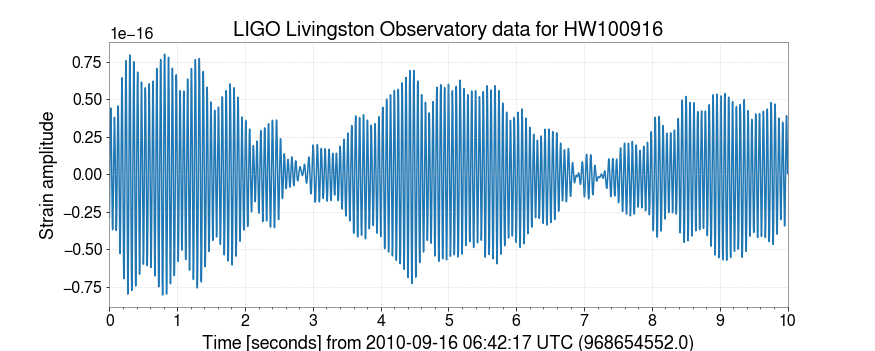

In [30]:
plot = data.plot(
    title='LIGO Livingston Observatory data for HW100916',
    ylabel='Strain amplitude',
)
plot.show()

In [27]:
data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

In [28]:
high = data.highpass(15)

In [29]:
psd = high.psd(4, 2)
zoom = high.crop(1126259460, 1126259464)

In [41]:
from pycbc.waveform import get_fd_waveform
hp, _ = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
                        f_lower=20, f_final=2048, delta_f=psd.df.value)


In [44]:
from pycbc.filter import matched_filter
snr = matched_filter(hp, zoom.to_pycbc(), psd=psd.to_pycbc(),low_frequency_cutoff=15)
snrts = TimeSeries.from_pycbc(snr).abs()


RuntimeError: Oh no! You tried to use capabilities we haven't ported to python3 yet

In [43]:
plot = snrts.plot()
ax = plot.gca()
ax.set_xlim(1126259461, 1126259463)
ax.set_epoch(1126259462.427)
ax.set_ylabel('Signal-to-noise ratio (SNR)')
ax.set_title('LIGO-Hanford signal-correlation for GW150914')
plot.show()

NameError: name 'snrts' is not defined

In [38]:
 from ligotimegps import LIGOTimeGPS

In [39]:
import ligo

<module 'ligo.segments' from '/usr/local/lib/python3.6/dist-packages/ligo/segments/__init__.py'>